# Text-to-Text Similarity : Jiang & Conrath 1997


$$
Sim_{jnc} = \frac{1}{IC(concept_{1}) + IC(concept_{2}) - 2*IC(LCS)}
$$

The Jiang and Conrath combines both corpus and knowledge based techniques like the *Resnik* and *Lin* measures. 

The intuition behind this formula is not clear to me. If two concepts are perfectly equal the similarity is undefined, and if they share no attributes they have a low similarity which is lower the greater IC each concept has. To me this doesn't make sense.

Let's see how well it performs though.

#### REFERENCES

1. [Jiang & Conrath 1997 - Semantic Similarity based on Corpus Statistics and Lexical Taxonomy](./papers/Jiang_Conrath-1997_semantic-similarity-based-on-corpus-statistics.pdf)

In [7]:
import sys
import numpy as np
sys.path.append('../')
import libs.utils as utils
import libs.stats as stats
import libs.preprocessing as pp
import libs.text2text as tt
from importlib import reload
import spacy

In [3]:
# Load Dataset
df2_en = utils.load_dataframe(language='en', version=2)
print(len(df2_en))

nlp_en = spacy.load('en')

# Data Preparation
from nltk.corpus import wordnet_ic
brown_ic = wordnet_ic.ic('ic-brown.dat')

2442


## E1.1 v2.0_en [NN,VB,ADJ]

In [19]:
reload(tt)
jiang_conrath_fn = tt.create_jiang_conrath_function(brown_ic)

e11_res = tt.run_entailment_model(nlp_en, df2_en, 
                                  sim_fn=jiang_conrath_fn, 
                                  lang='eng',
                                  stop_words=pp.EN_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB', 'ADJ'])

batch: 300 done.
batch: 600 done.
batch: 900 done.
batch: 1200 done.
batch: 1500 done.
batch: 1800 done.
batch: 2100 done.
batch: 2400 done.


Accuracy: 19.984%
Precision: 50.033%
Recall: 19.984%
F1-Measure: 25.213%
Pearson's R: 0.41
Cohen's Kappa: 0.06
RMSE: 2.25
MAE: 1.79
Y-True Mean: 4.15
Y-Pred Mean: 2.47
Y-True Std Deviation: 1.12
Y-Pred Std Deviation: 1.56


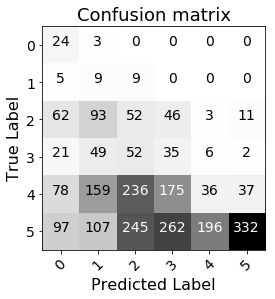

In [20]:
stats.print_big4(e11_res['y_true'], e11_res['y_pred'])
stats.print_stats(e11_res['y_true'], e11_res['y_pred'])
stats.plot_confusion_matrix(stats.cm(e11_res['y_true'], e11_res['y_pred']), classes=np.unique(e11_res['y_true']))

## E1.2 v1.0_en [NN,VB,ADJ]

1. Let's compare this method to another dataset.

In [21]:
# Load Dataset
df1_en = utils.load_dataframe(language='en', version=1)
print(len(df1_en))

e12_res = tt.run_entailment_model(nlp_en, df1_en, 
                                  sim_fn=jiang_conrath_fn, 
                                  lang='eng',
                                  stop_words=pp.EN_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB', 'ADJ'])

630
batch: 300 done.
batch: 600 done.


Accuracy: 22.063%
Precision: 50.661%
Recall: 22.063%
F1-Measure: 26.342%
Pearson's R: 0.44
Cohen's Kappa: 0.08
RMSE: 2.08
MAE: 1.62
Y-True Mean: 4.03
Y-Pred Mean: 2.54
Y-True Std Deviation: 1.18
Y-Pred Std Deviation: 1.50


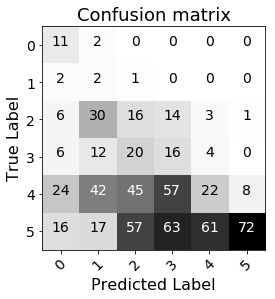

In [22]:
stats.print_big4(e12_res['y_true'], e12_res['y_pred'])
stats.print_stats(e12_res['y_true'], e12_res['y_pred'])
stats.plot_confusion_matrix(stats.cm(e12_res['y_true'], e12_res['y_pred']), classes=np.unique(e12_res['y_true']))

###  Notes:

1. Impossible to run this for other languages since the datasets for Information Content are not available.